# Customer Behaviour Analysis Based on Transaction Data

### Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the first dataset 

In [41]:
#Loading the first dataset and having a first look at it.
df = pd.read_csv(r'C:\Users\user\Desktop\MAX\Hackathon_Ideal_Data.csv')
df.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [3]:
df.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [4]:
pd.isnull(df).sum()

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [5]:
df.columns

Index(['MONTH', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP', 'CMP',
       'MBRD', 'BRD'],
      dtype='object')

In [7]:
df.nunique()

MONTH           3
STORECODE      10
QTY           258
VALUE        1606
GRP            80
SGRP          177
SSGRP         242
CMP           512
MBRD          818
BRD          1613
dtype: int64

In [9]:
# looking for categorical columns
cat_columns = []
for i in df.columns :
    if (df[i].dtype == 'object') :
        cat_columns.append(i)
print(cat_columns)

['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD']


A scatter plot of Values vs Month


<Axes: xlabel='STORECODE', ylabel='QTY'>

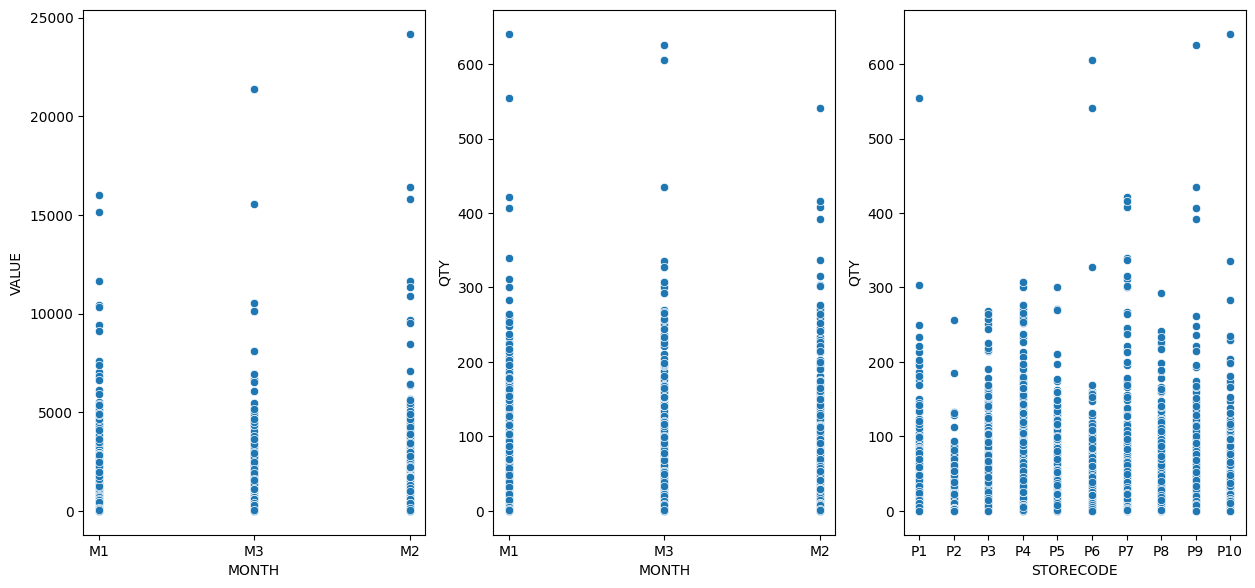

In [44]:
#Scatter Plots for Categorical Columns against 'VALUE' and 'QTY'
print('A scatter plot of Values vs Month')
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.scatterplot(df, x = 'MONTH', y= 'VALUE')
plt.subplot(2,3,2)
sns.scatterplot(df, x = 'MONTH', y = 'QTY')
plt.subplot(2,3,3)
sns.scatterplot(df, x = 'STORECODE', y = 'QTY')


The density near 0 is alarming, so i will try and omit values and QTY with 0 and check again

<Axes: xlabel='STORECODE', ylabel='QTY'>

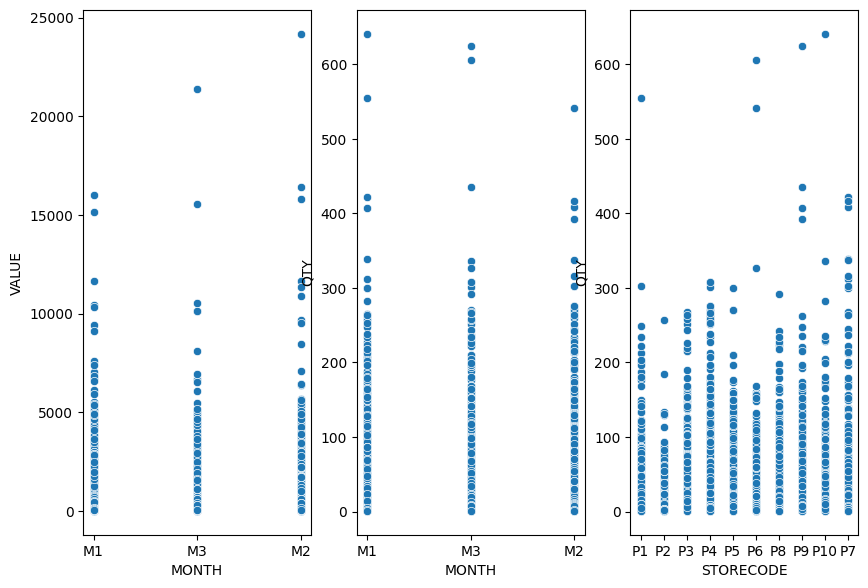

In [11]:
# Dropping the zero rows
df = df.drop(df[df['QTY'] == 0].index)
df = df.drop(df[df['VALUE'] == 0].index)

# Plotting the resultant data frame
plt.figure(figsize = (10, 15))
plt.subplot(2, 3, 1)
sns.scatterplot(df, x = 'MONTH', y= 'VALUE')
plt.subplot(2,3,2)
sns.scatterplot(df, x = 'MONTH', y = 'QTY')
plt.subplot(2,3,3)
sns.scatterplot(df, x = 'STORECODE', y = 'QTY')

Visualizing the data using a boxplot, and as I expected, the dataset has several outliers.

<Axes: ylabel='VALUE'>

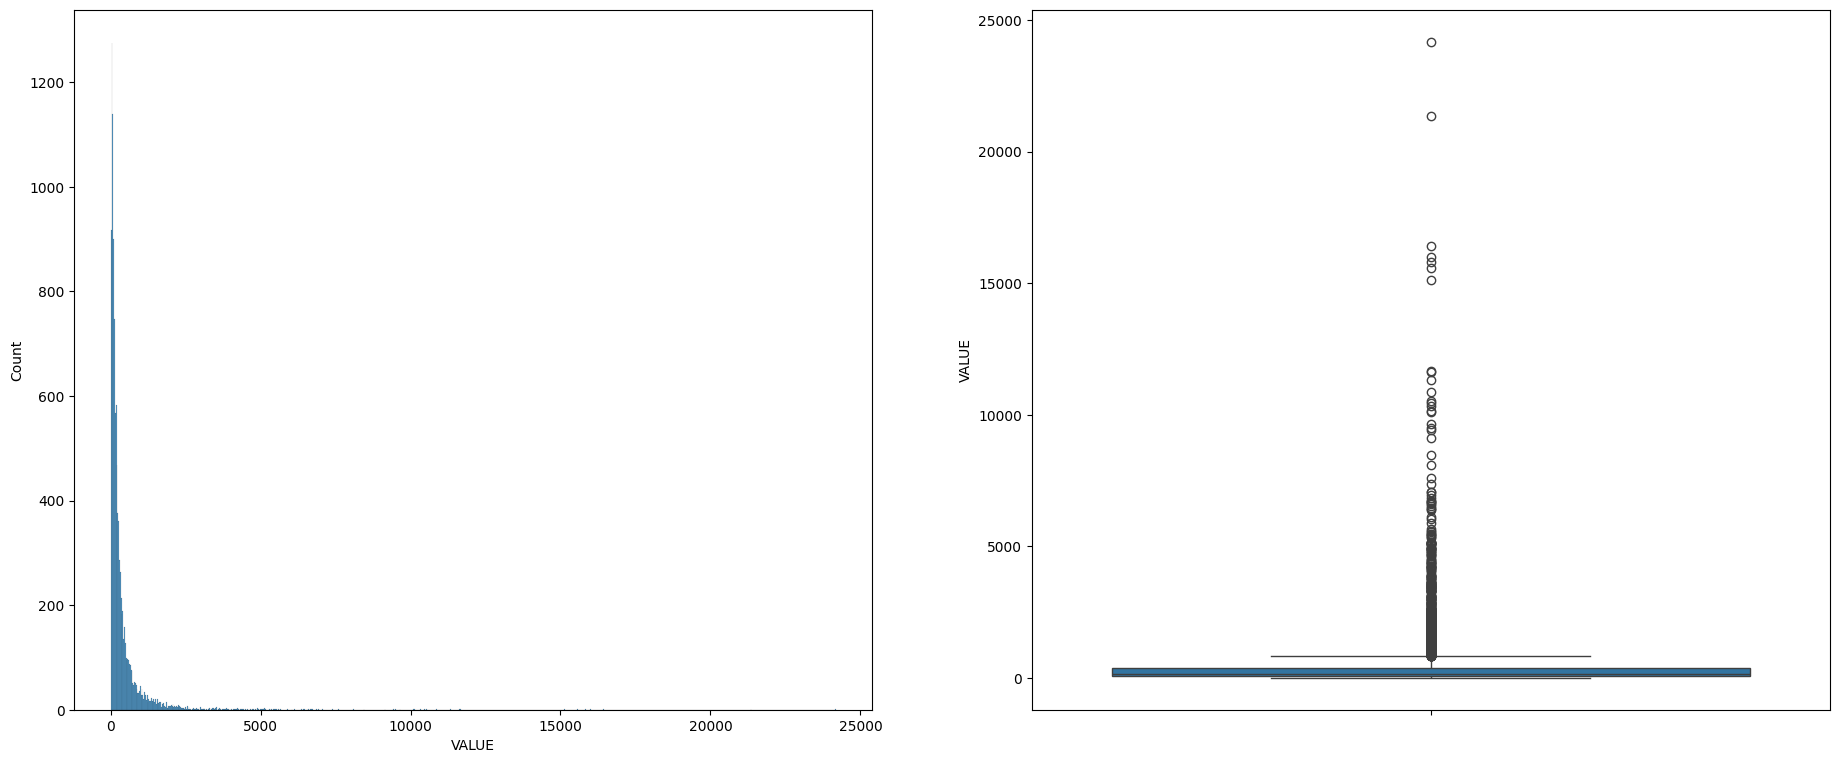

In [12]:
#Box Plot to visualize outliers
plt.figure(figsize = (35, 20))
plt.subplot(2,3,1)
sns.histplot(df['VALUE'])
plt.subplot(2, 3, 2)
sns.boxplot(df['VALUE'])

I will start cleaning the data using the IQR outlier detection method, notice  how it dropped more than 50% of the data.

To remove the outliers, I followed the percentile method.

(14260, 10)
Upper Limit is : 707.5
Lower Limit is : 25.0
(9271, 10)
Upper Limit is : 3098.609999999997
Lower Limit is : 0.0
(10784, 10)


<Axes: xlabel='MONTH', ylabel='QTY'>

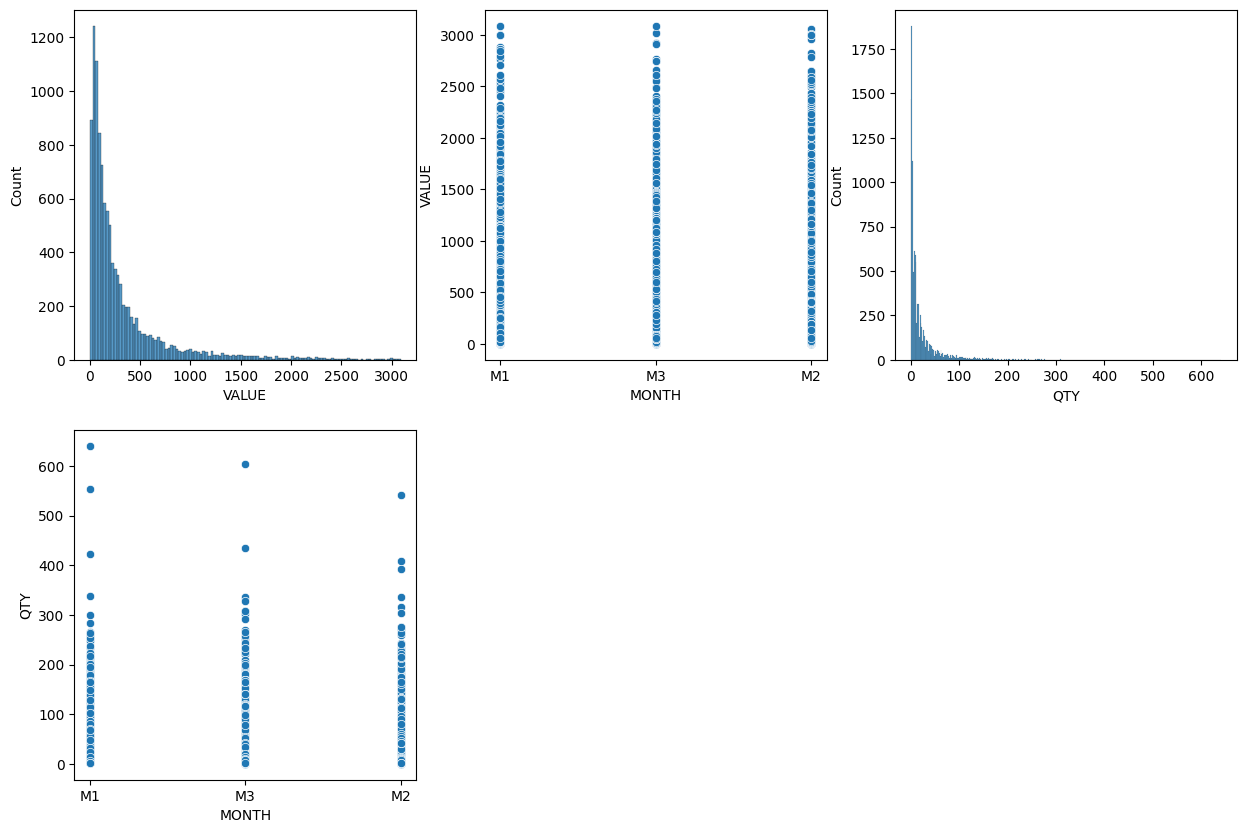

In [47]:
#Defining the InterQuartileRange
print(df.shape)
IQR25 = df['VALUE'].quantile(0.25)
IQR75 = df['VALUE'].quantile(0.75)

#Definig the Upper and Lower Limits for the 'VALUE' Column
UL = IQR75 + 1.5 * IQR75
LL = IQR25 + 1.5 * IQR25
print('Upper Limit is :', UL)
print('Lower Limit is :', LL)
Trial = df[df['VALUE'] < UL]
Trial = Trial[Trial['VALUE'] > 11]
print(Trial.shape)

Upper = df['VALUE'].quantile(0.99)
Lower = df['VALUE'].quantile(0.01)
print('Upper Limit is :', Upper)
print('Lower Limit is :', Lower)
CF = df[(df['VALUE'] < Upper) & (df['VALUE'] > Lower)]
print(CF.shape)

#Ploting the resultant dataframe
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.histplot(CF['VALUE'])
plt.subplot(2,3,2)
sns.scatterplot(CF,x= 'MONTH' , y = 'VALUE')
plt.subplot(2,3,3)
sns.histplot(CF['QTY'])
plt.subplot(2,3,4)
sns.scatterplot(CF,x= 'MONTH' , y = 'QTY')

In [17]:
##Definig the Upper and Lower Limits for the 'QTY' Column
upper = CF['QTY'].quantile(0.99)
lower = CF['QTY'].quantile(0.01)
print('Upper Limit is :', upper)
print('Lower Limit is :', lower)
CF2 = CF[(CF['QTY'] >= lower) & (CF['QTY'] <= upper)]
print(CF2.shape)

Upper Limit is : 176.0
Lower Limit is : 1.0
(10590, 10)


<bound method NDFrame.describe of       MONTH STORECODE  QTY  VALUE                       GRP  \
0        M1        P1   25     83         HAIR CONDITIONERS   
1        M1        P1    6     22         HAIR CONDITIONERS   
2        M1        P1    4     15         HAIR CONDITIONERS   
3        M1        P1   15     60         HAIR CONDITIONERS   
4        M1        P2    0      0         HAIR CONDITIONERS   
...     ...       ...  ...    ...                       ...   
14255    M3       P10    0      0  SUGAR SUBSTITUTE (11/05)   
14256    M3        P8    1     62  SUGAR SUBSTITUTE (11/05)   
14257    M1        P6    0      0  SUGAR SUBSTITUTE (11/05)   
14258    M1       P10    0      0  SUGAR SUBSTITUTE (11/05)   
14259    M1        P8    1     62  SUGAR SUBSTITUTE (11/05)   

                        SGRP                  SSGRP  \
0          HAIR CONDITIONERS      HAIR CONDITIONERS   
1          HAIR CONDITIONERS      HAIR CONDITIONERS   
2          HAIR CONDITIONERS      HAIR CONDI

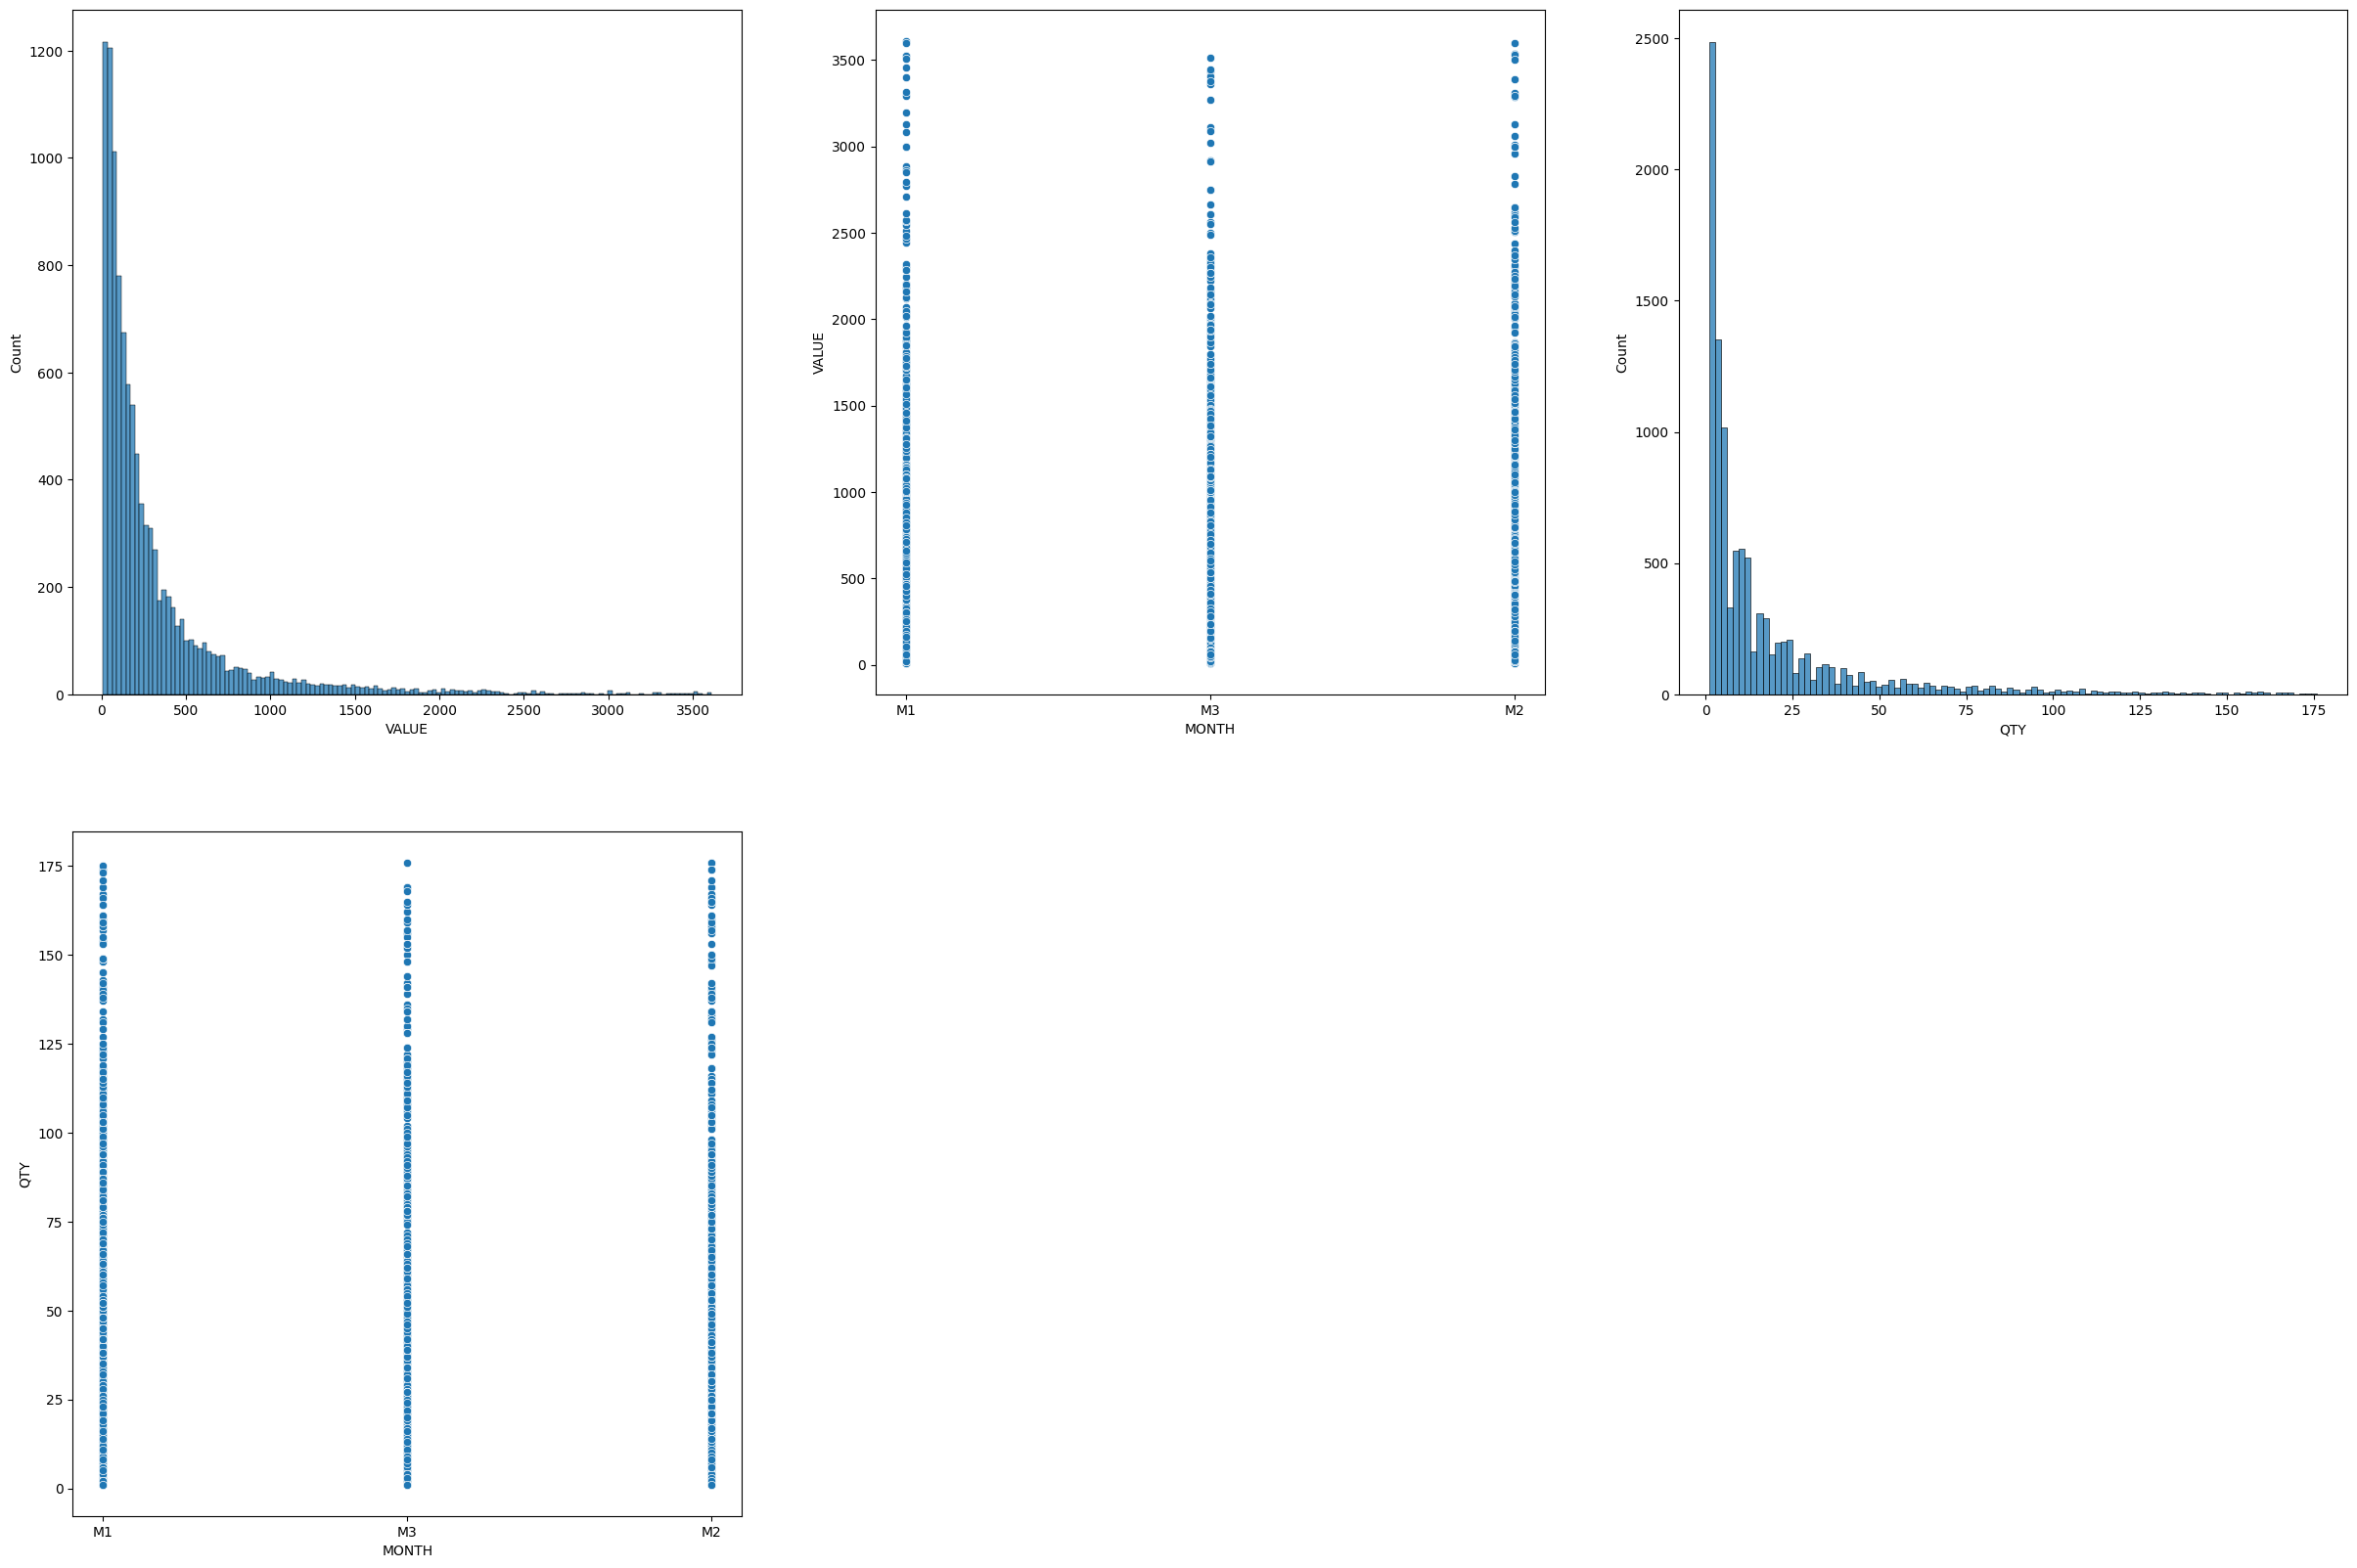

In [45]:
#Ploting the resultant dataframe
plt.figure(figsize = (30, 20))
plt.subplot(2, 3, 1)
sns.histplot(CF2['VALUE'])
plt.subplot(2, 3, 2)
sns.scatterplot(CF2, x = 'MONTH', y = 'VALUE')
plt.subplot(2, 3, 3)
sns.histplot(CF2['QTY'])
plt.subplot(2, 3, 4)
sns.scatterplot(CF2, x = 'MONTH', y = 'QTY')

print(df.describe)
print(CF.describe)
print(CF2.describe)

After removing the outliers, I will visualize the data to try and get useful information.


<Axes: ylabel='VALUE'>

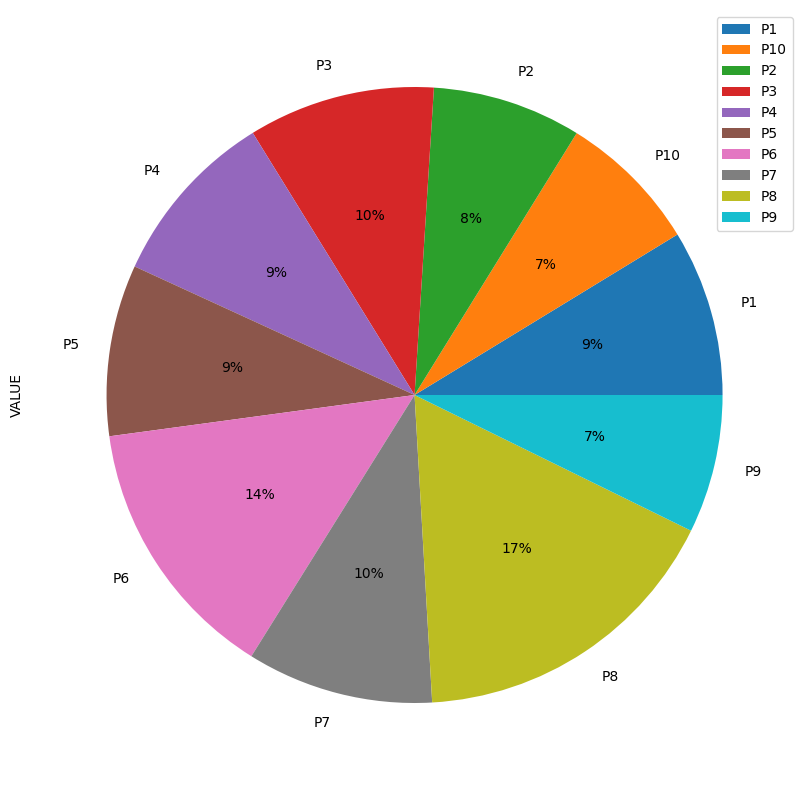

In [26]:
#Group by storecode to identify the top-performing stores
CF2.groupby(['STORECODE']).sum().plot(kind = 'pie', y = 'VALUE',autopct='%1.0f%%', figsize = (15, 10))

From the pie chart, store P8 generates the highest revenue while P9 and P1 generate the least.

In [ ]:
M_Sales = CF2.groupby('MONTH').sum()
plt.figure(figsize = (15, 10))
sns.barplot(x = M_Sales.index, y = )

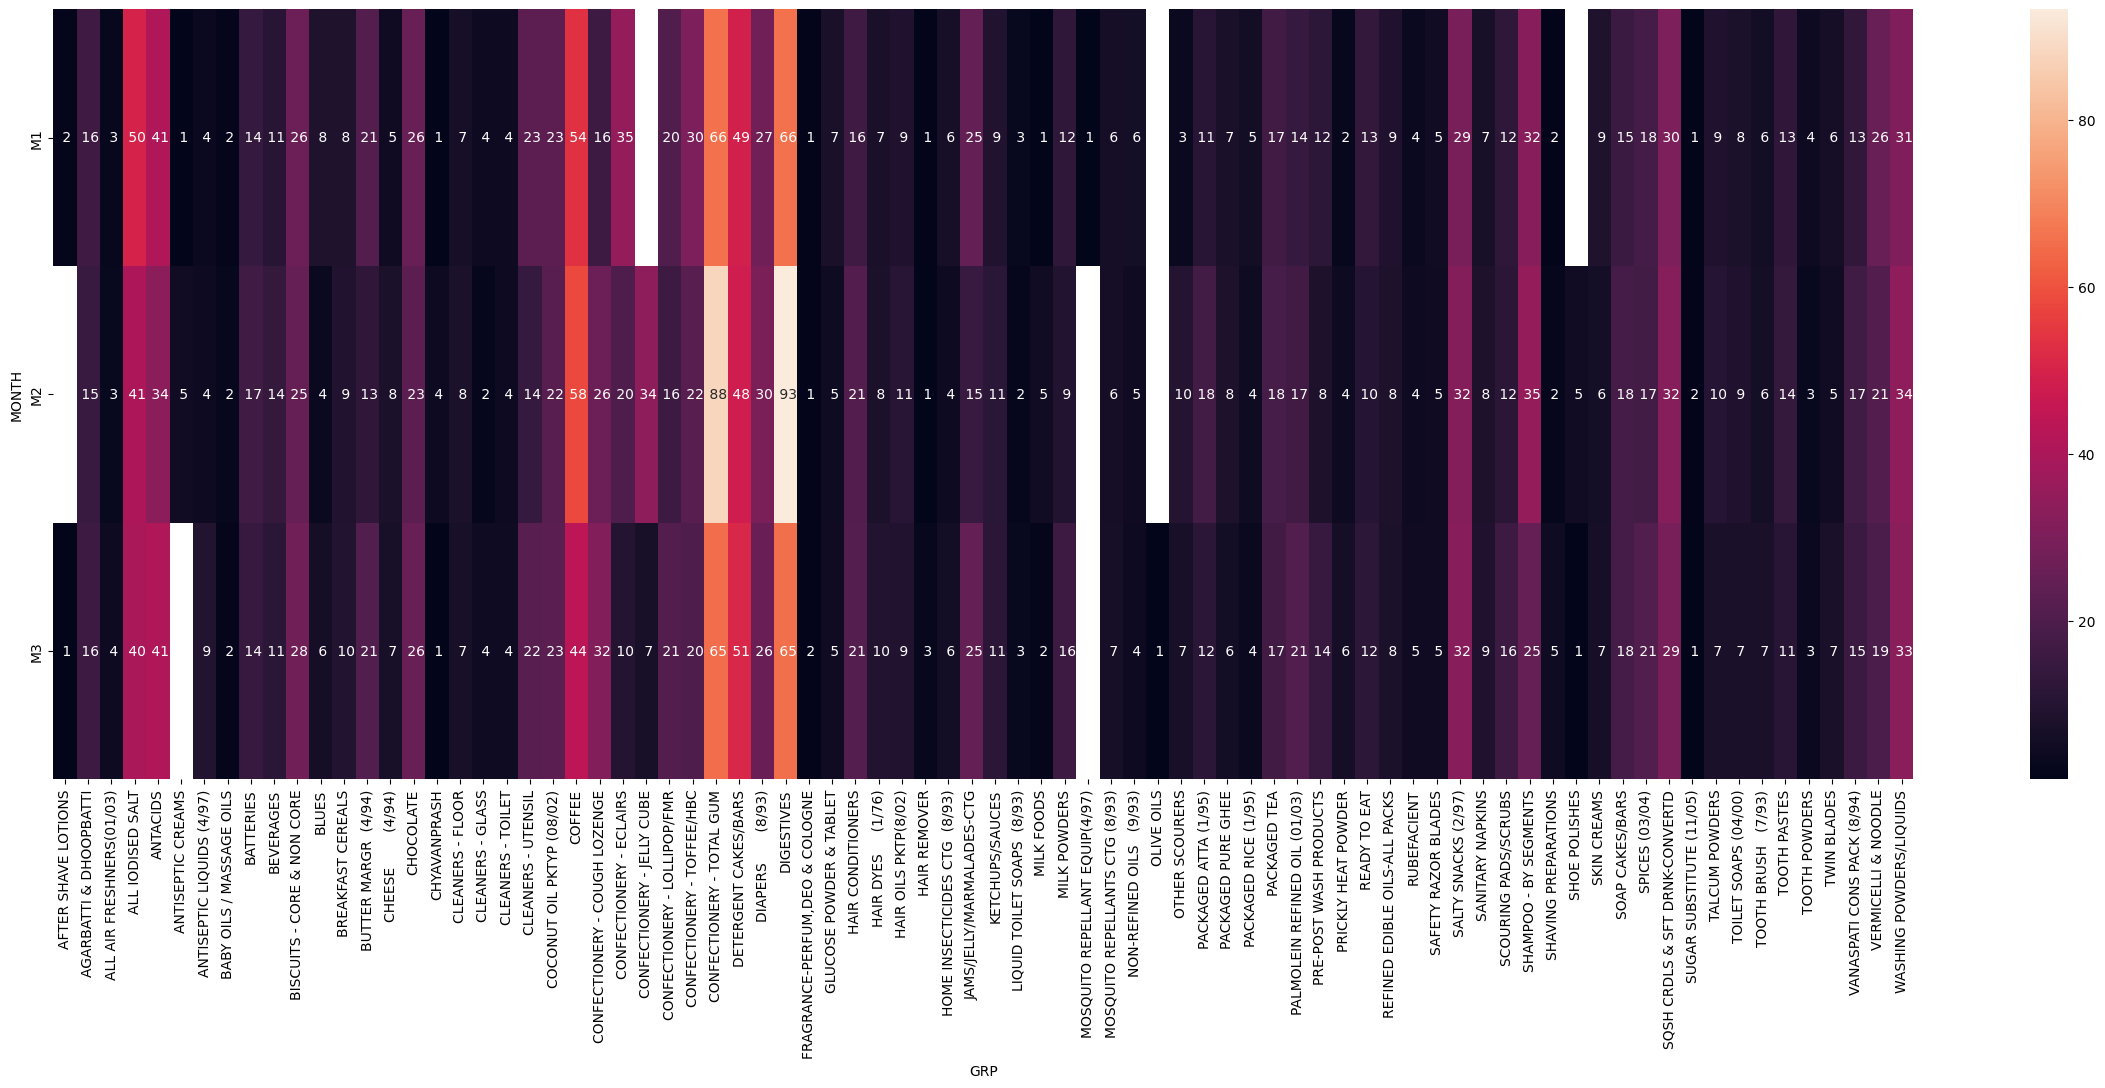

In [33]:
valuevsqtyvsgrp = CF2.pivot_table(index = 'MONTH', columns = 'GRP', values = 'QTY')
plt.figure(figsize = (30,10))
sns.heatmap(valuevsqtyvsgrp,annot = True, fmt = ' .0f')
plt.show()

From the heatmap, "TOTAL GUM", "DETERGENT CAKES/BARS", "DIGESTIVES", "COFFEE", "ALL IODIZED SALT" and "ANTACIDS" are the highest 6 Groups in terms of Quantities bought accross all three months. However it seems that the second month is quite heavy on Gum and Digestives.

    index                            GRP        QTY        VALUE
0      53  PALMOLEIN REFINED OIL (01/03)  16.809524  1437.000000
1      57  REFINED EDIBLE OILS-ALL PACKS   8.156250  1283.523438
2      49           PACKAGED ATTA (1/95)  13.437500  1171.359375
3      13           BUTTER MARGR  (4/94)  17.956522  1153.913043
4      14           CHEESE        (4/94)   6.200000  1149.866667
5      21      COCONUT OIL PKTYP (08/02)  22.709091  1129.872727
6      50             PACKAGED PURE GHEE   7.068182  1007.534091
7      51           PACKAGED RICE (1/95)   4.447368   873.657895
8      79        WASHING POWDERS/LIQUIDS  32.779026   741.067416
9       3               ALL IODISED SALT  43.105263   692.618421
10     52                   PACKAGED TEA  17.344322   670.150183
11     30           DIAPERS       (8/93)  27.600000   641.914286
12     77     VANASPATI CONS PACK (8/94)  14.851064   631.893617
13     46      NON-REFINED OILS   (9/93)   4.907216   628.381443
14      9                

<Axes: xlabel='GRP'>

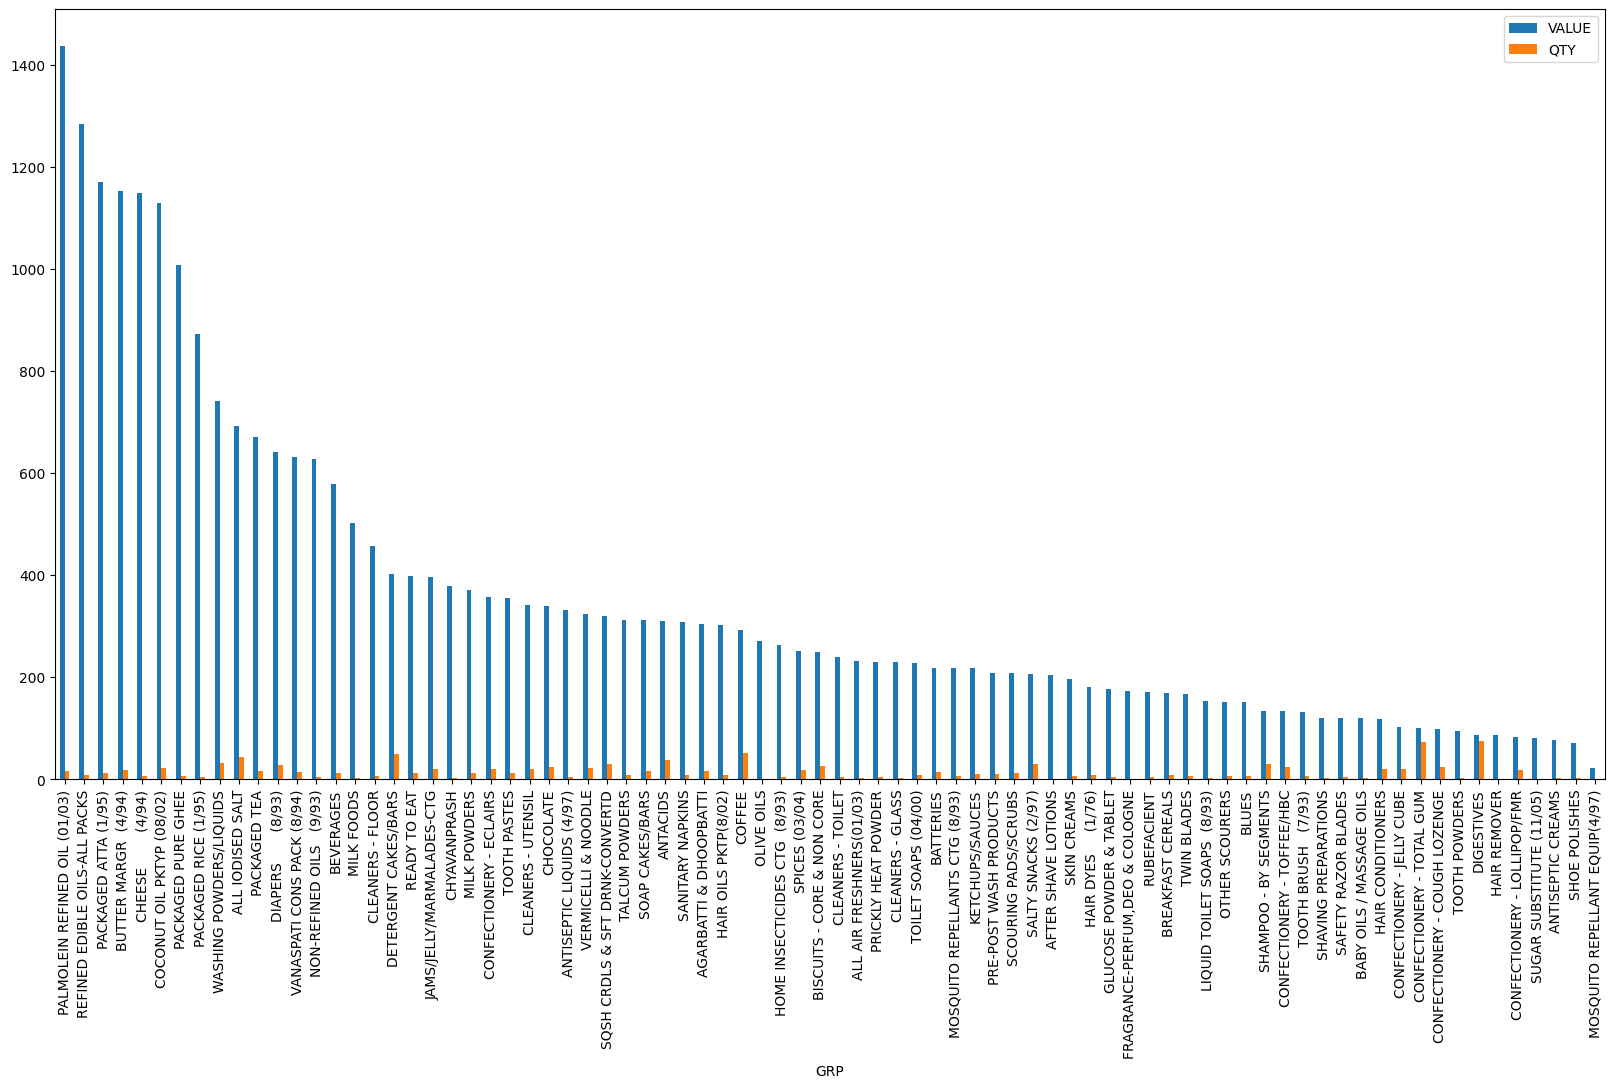

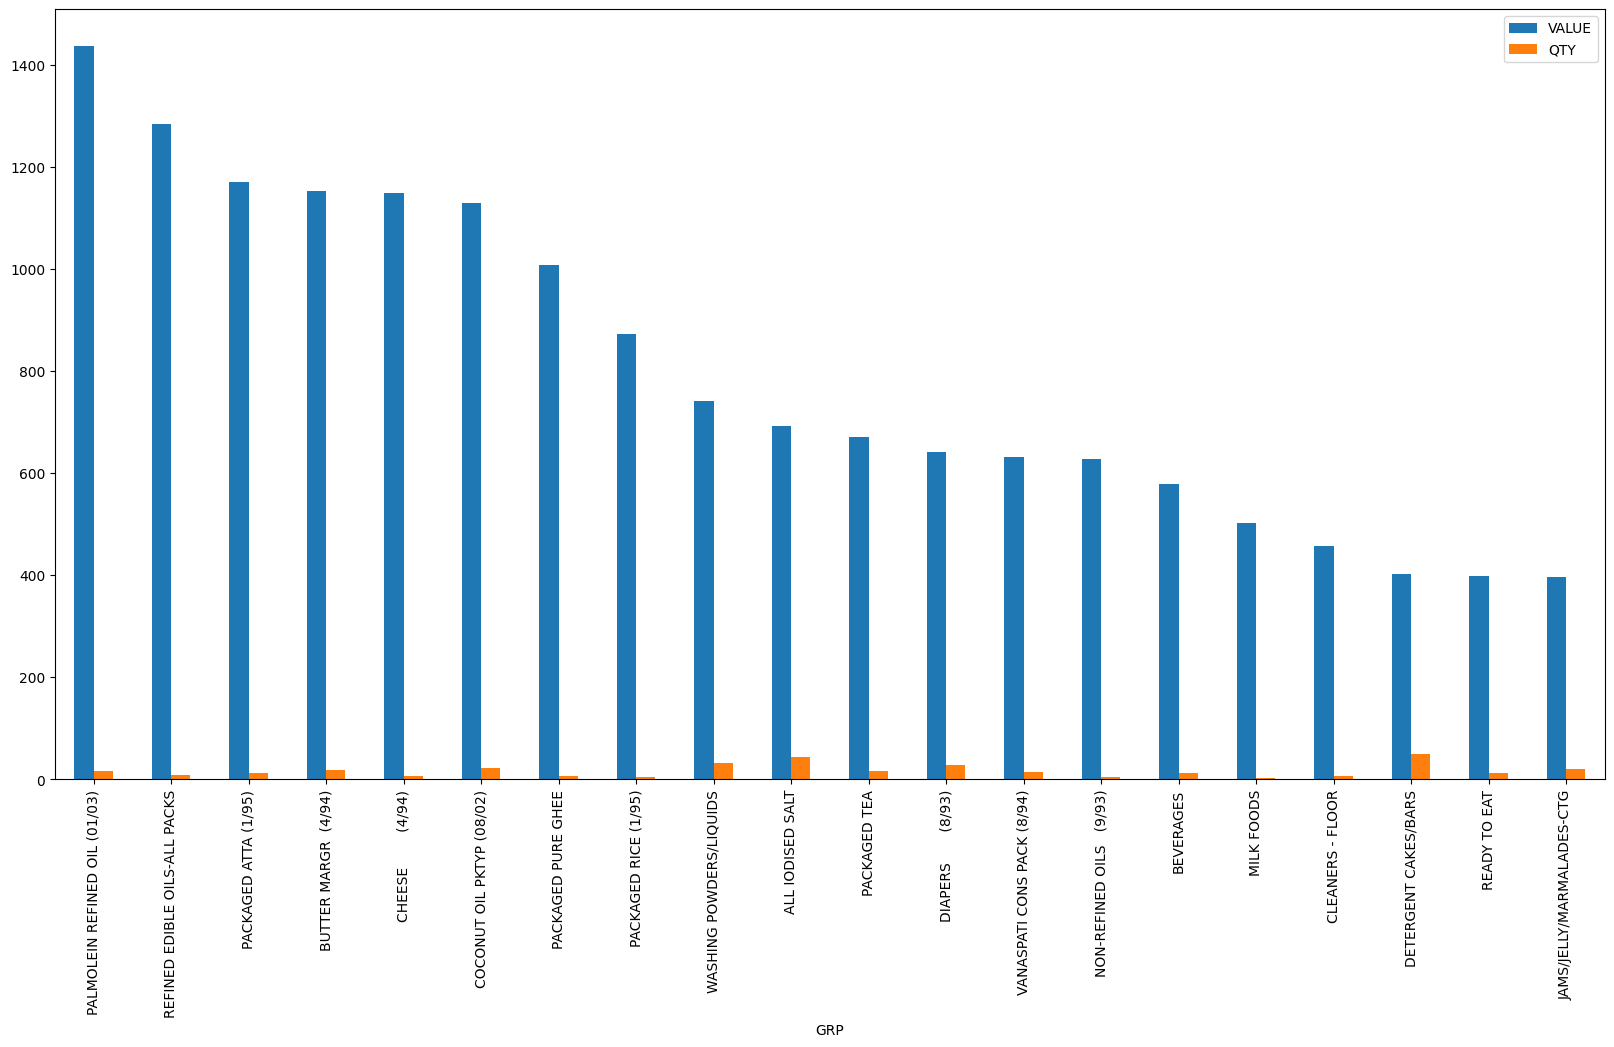

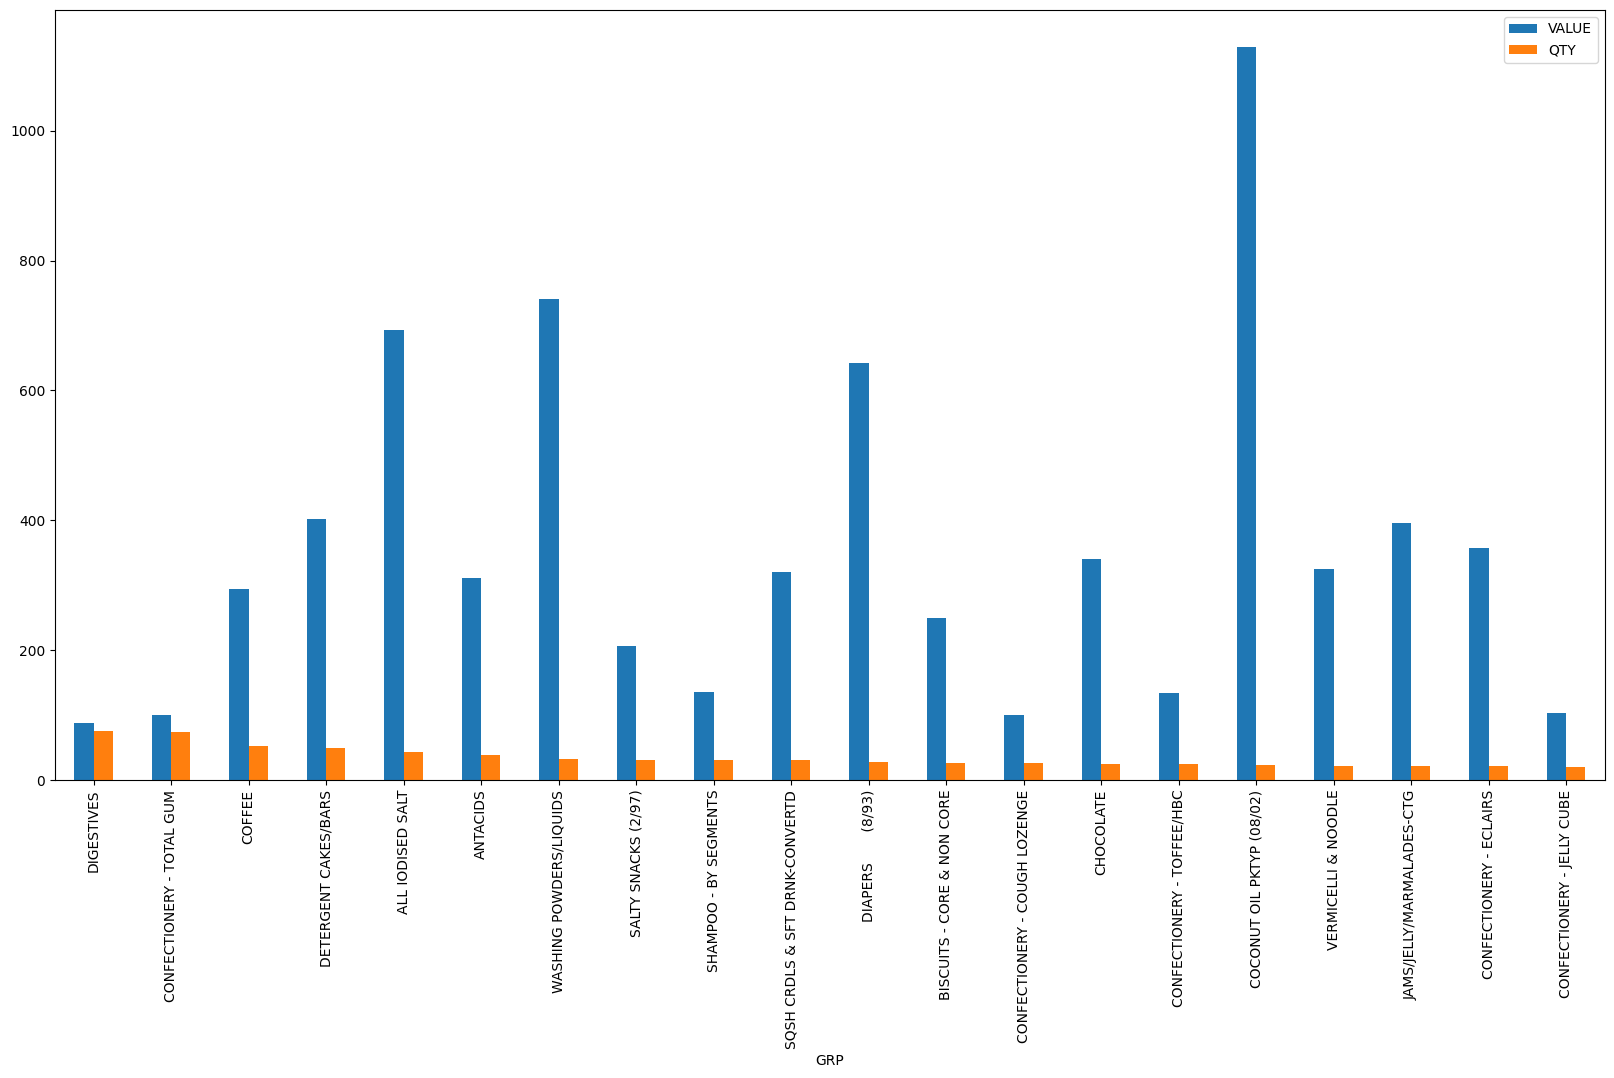

In [49]:
##Mean 'VALUE' and 'QTY' for each Product category
grp_mean = CF2.groupby('GRP').mean(numeric_only = True)
grp_mean = grp_mean.reset_index()

grp_meanV = grp_mean.nlargest(n = 20 , columns = 'VALUE')
grp_meanV = grp_meanV.reset_index()
grp_meanQ = grp_mean.nlargest(n= 20, columns = 'QTY')
grp_meanQ = grp_meanQ.reset_index()

print(grp_meanV.sort_values(by = 'VALUE', ascending = False), '\n', grp_meanQ.sort_values(by = 'QTY', ascending = False))

##Ploting the results
grp_mean.sort_values(by = 'VALUE', ascending = False).plot(x = 'GRP', y = ['VALUE', 'QTY'], kind = 'bar', figsize = (20, 10))

grp_meanV.sort_values(by = 'VALUE', ascending = False).plot(x = 'GRP', y = ['VALUE', 'QTY'], kind = 'bar', figsize = (20, 10))

grp_meanQ.sort_values(by = 'QTY', ascending = False).plot(x = 'GRP', y = ['VALUE', 'QTY'], kind = 'bar', figsize = (20, 10))

    index                             GRP        QTY       VALUE
19     48                  OTHER SCOURERS   7.083333  152.333333
18     11                           BLUES   6.000000  151.086957
17     63           SHAMPOO - BY SEGMENTS  30.766197  134.678873
16     27      CONFECTIONERY - TOFFEE/HBC  24.603604  134.108108
15     73            TOOTH BRUSH   (7/93)   6.243750  132.906250
14     64            SHAVING PREPARATIONS   2.821429  120.714286
13     59             SAFETY RAZOR BLADES   4.933333  120.177778
12      7        BABY OILS / MASSAGE OILS   2.000000  120.000000
11     34               HAIR CONDITIONERS  19.678899  119.357798
10     25      CONFECTIONERY - JELLY CUBE  20.500000  103.500000
9      28       CONFECTIONERY - TOTAL GUM  73.422222  100.288889
8      23   CONFECTIONERY - COUGH LOZENGE  25.232558   99.534884
7      75                   TOOTH POWDERS   3.500000   95.903846
6      31                      DIGESTIVES  74.833333   87.708333
5      37                

<Axes: xlabel='GRP'>

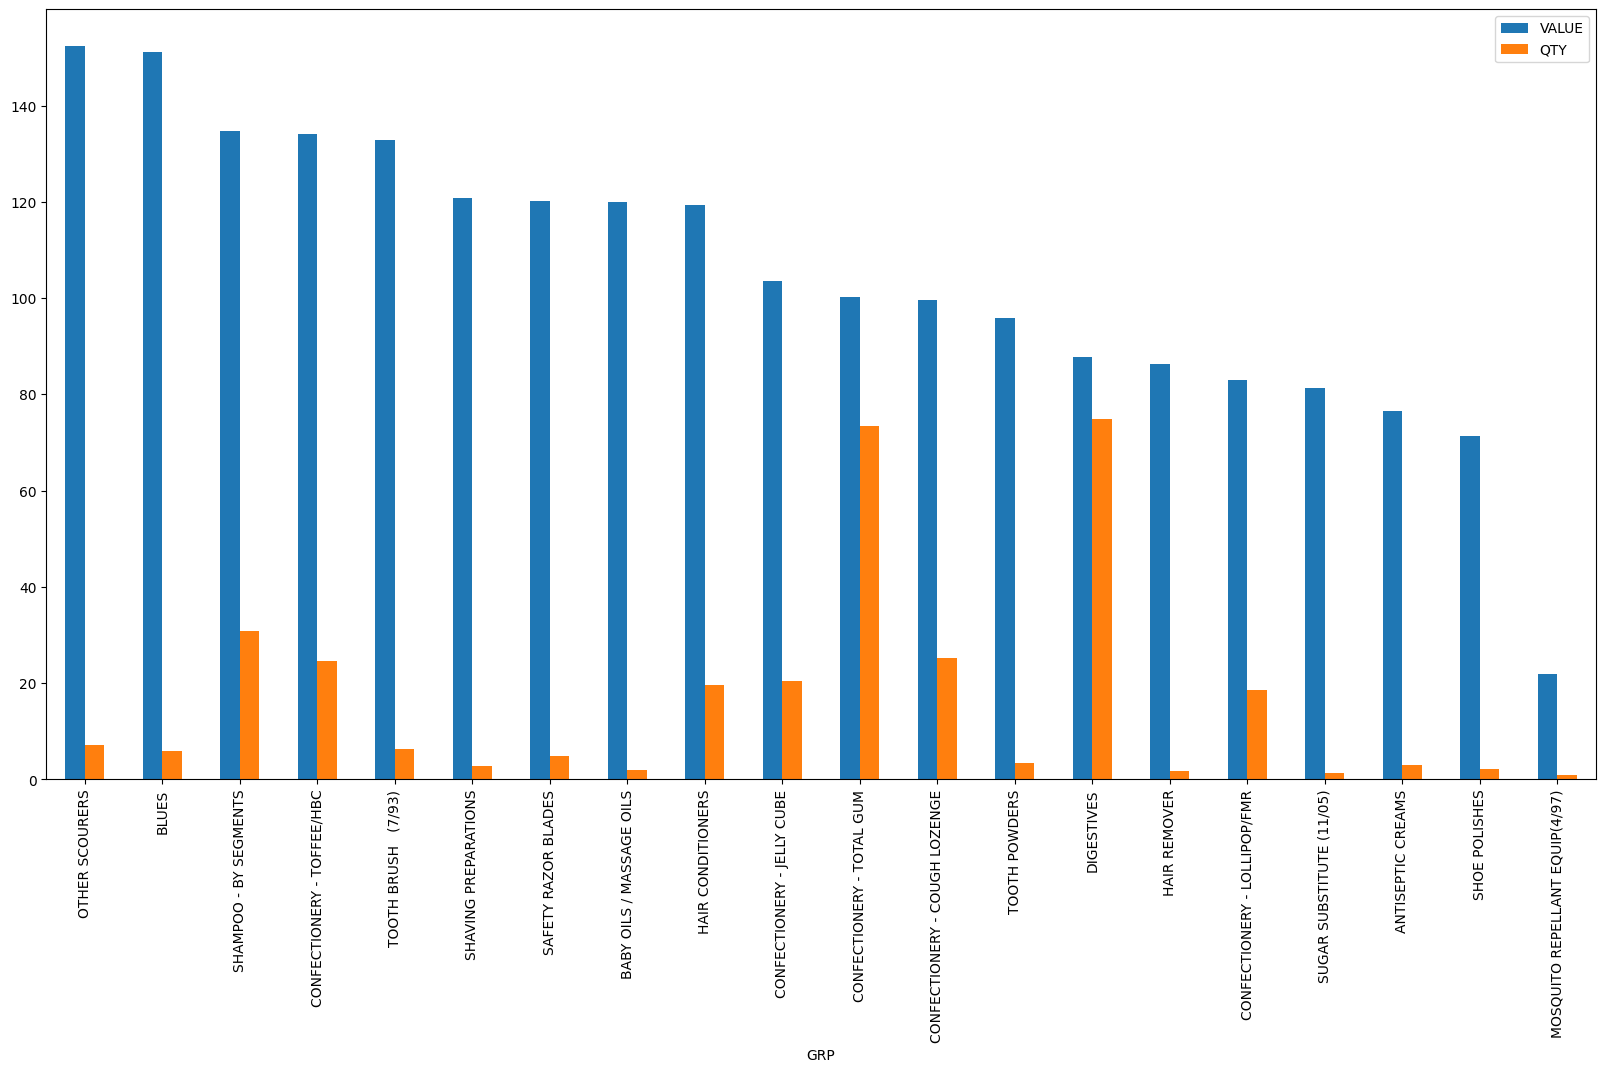

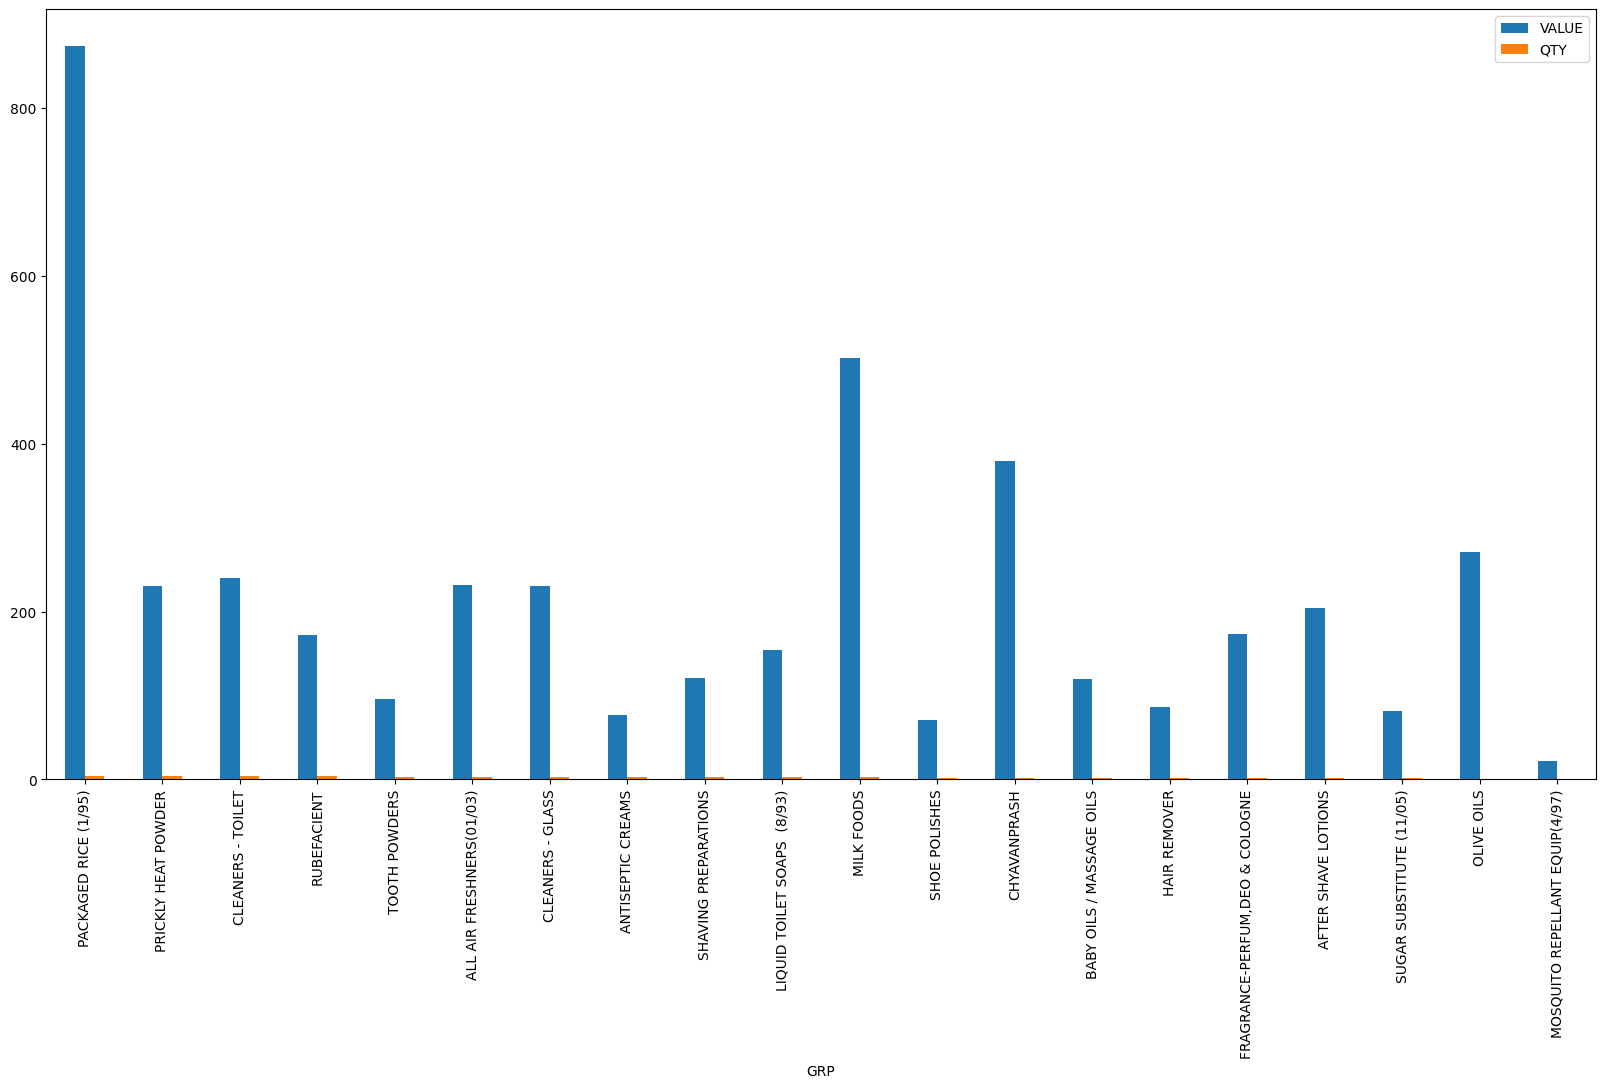

In [60]:
#Mean 'VALUE' and 'QTY' for each Product Category
grp_mean = CF2.groupby('GRP').mean(numeric_only = True)

grp_mean = grp_mean.reset_index()


grp_meanV = grp_mean.nsmallest(n=20, columns = ['VALUE'])
grp_mean_V = grp_meanV.reset_index()
grp_meanQ = grp_mean.nsmallest(n=20, columns = ['QTY'])
grp_mean_Q = grp_meanQ.reset_index()

print(grp_mean_V.sort_values(by=['VALUE'], ascending = False),' \n', grp_mean_Q.sort_values(by = ['QTY'], ascending = False))


#Ploting the results
grp_mean_V.sort_values(by = 'VALUE', ascending = False).plot(x="GRP", y=["VALUE", "QTY"], kind="bar", figsize=(20, 10))

grp_mean_Q.sort_values(by = 'QTY', ascending = False).plot(x="GRP", y=["VALUE", "QTY"], kind="bar", figsize=(20, 10))

### importing the second dataset

In [50]:
df2 = pd.read_csv(r'C:\Users\user\Desktop\MAX\Hackathon_Working_Data.csv')
df2.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [51]:
df2.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [52]:
df2.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

Text(0, 0.5, 'SALES')

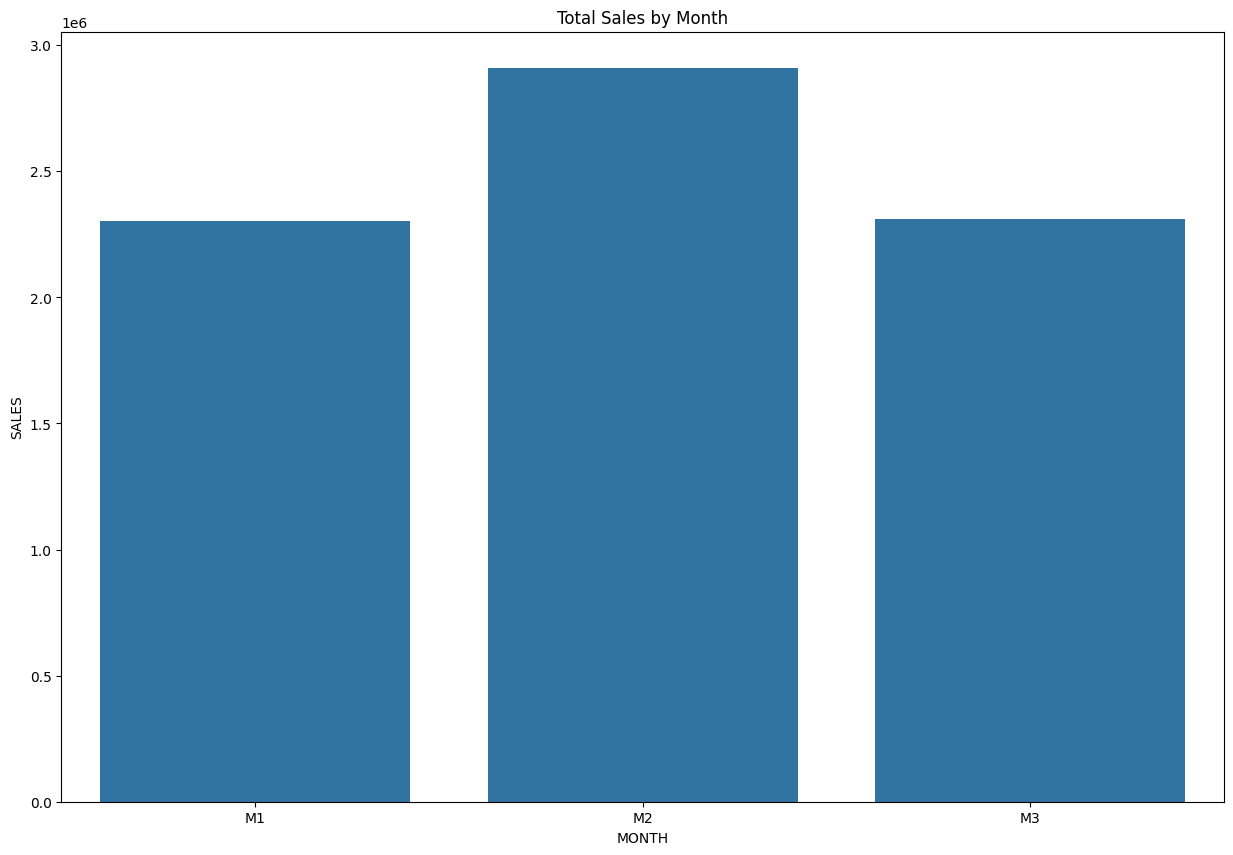

In [57]:
#A Barplot to describe Total Sales
M_Sales = df2.groupby('MONTH').sum()
plt.figure(figsize = (15, 10))
sns.barplot(x = M_Sales.index, y = 'BILL_AMT', data = M_Sales)
plt.title('Total Sales by Month')
plt.xlabel('MONTH')
plt.ylabel('SALES')


From the barplot, M2 generated more Sales compared to M1 AND M3. 


Text(0, 0.5, 'SALES')

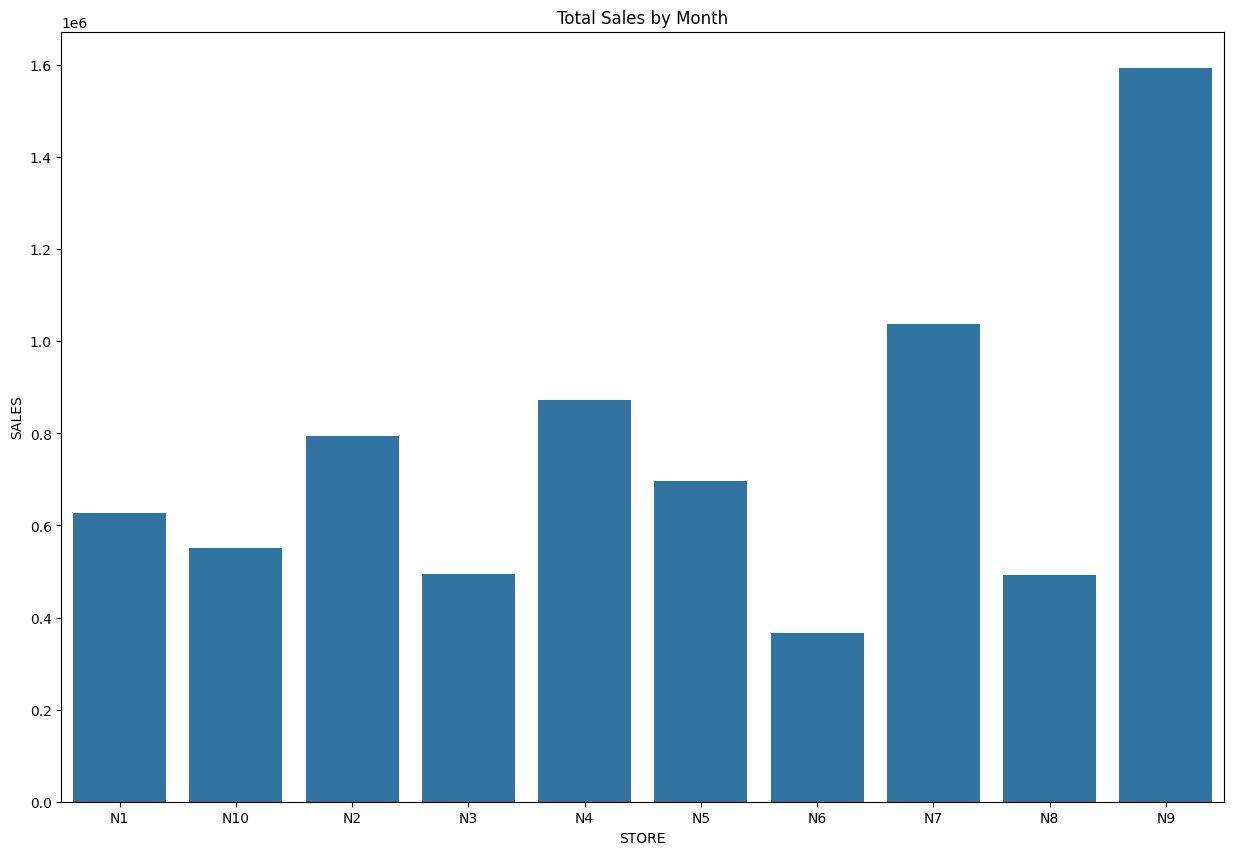

In [64]:
S_Sales = df2.groupby('STORECODE').sum()
plt.figure(figsize = (15, 10))
sns.barplot(x = S_Sales.index, y = 'BILL_AMT', data = S_Sales)
plt.title('Total Sales by Month')
plt.xlabel('STORE')
plt.ylabel('SALES')

At the end, the data presented here reiterates the amazing and diverse customer behaviour accross the 3 months and 9 stores.